# Analisis Exploratorio

In [ ]:

pip install pandas

In [20]:
import pandas as pd


c2024 = pd.read_excel("./sample_data/Consumos_2024.xlsx", skiprows = 6, nrows = 300) #Solo 300 registros
c2025 = pd.read_excel("./sample_data/Consumos_2025.xlsx", skiprows = 6, nrows = 5)
consumos = pd.concat([c2024, c2025], ignore_index= True)
i2024 = pd.read_excel("./sample_data/Importaciones_combustibles_2024.xlsx", skiprows = 6, nrows = 288)
i2025 = pd.read_excel("./sample_data/Importaciones_combustibles_2025.xlsx", skiprows = 6, nrows = 5)
importaciones = pd.concat([i2024, i2025], ignore_index= True)

consumos['Fecha'] = pd.to_datetime(consumos['Fecha']).dt.strftime('%Y-%m')
importaciones['Fecha'] = pd.to_datetime(consumos['Fecha']).dt.strftime('%Y-%m')


## Analisis Series de Tiempo


## IMPORTACIONES

Primero obtenemos los datos filtrados

In [29]:
# Asegurar que los nombres de columnas estén limpios
importaciones.columns = importaciones.columns.str.strip()

# Seleccionar columnas específicas
columnas_deseadas = [
    'Fecha',
    'Gasolina superior',
    'Gasolina regular',
    'Gas licuado de petróleo',
    'Diesel alto azufre'
]

# Filtrar el DataFrame
importaciones_filtrado = importaciones[columnas_deseadas]
consumo_filtrado = consumos[columnas_deseadas]


Ahora graficamos

/tmp/ipython-input-26-4189139993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones_filtrado['Fecha'] = pd.to_datetime(importaciones_filtrado['Fecha'])


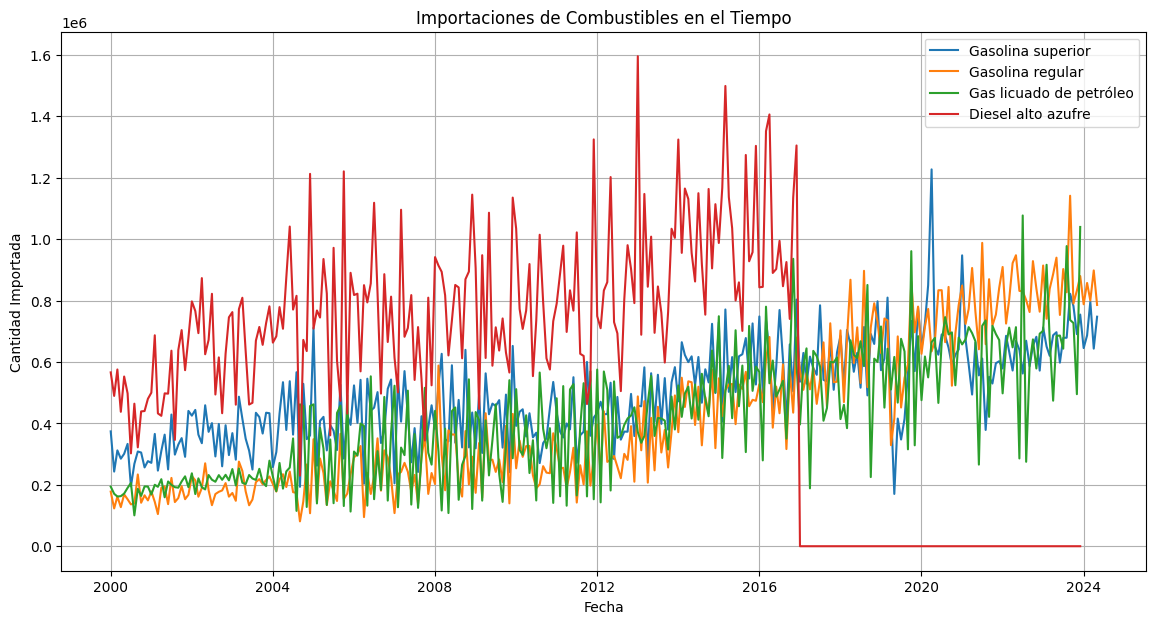

In [26]:
import matplotlib.pyplot as plt

# Asegurarse que la columna Fecha sea de tipo datetime
importaciones_filtrado['Fecha'] = pd.to_datetime(importaciones_filtrado['Fecha'])

plt.figure(figsize=(14, 7))

for columna in columnas_deseadas[1:]:  # Excluimos 'Fecha'
    plt.plot(importaciones_filtrado['Fecha'], importaciones_filtrado[columna], label=columna)

plt.title('Importaciones de Combustibles en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')
plt.legend()
plt.grid(True)
plt.show()


Obtenemos sus componentes

<Figure size 1400x1000 with 0 Axes>

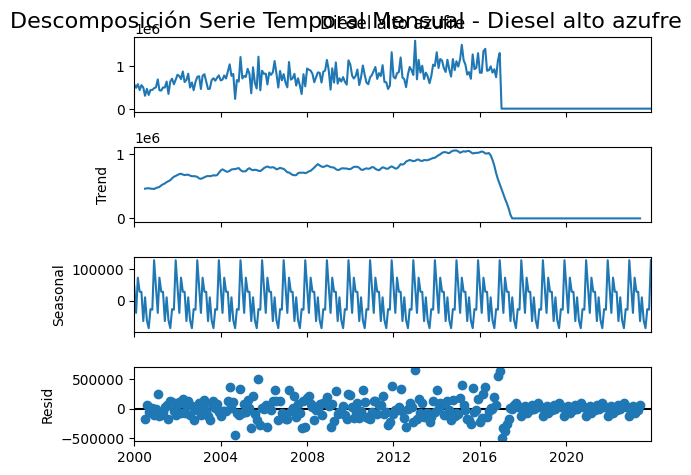

<Figure size 1400x1000 with 0 Axes>

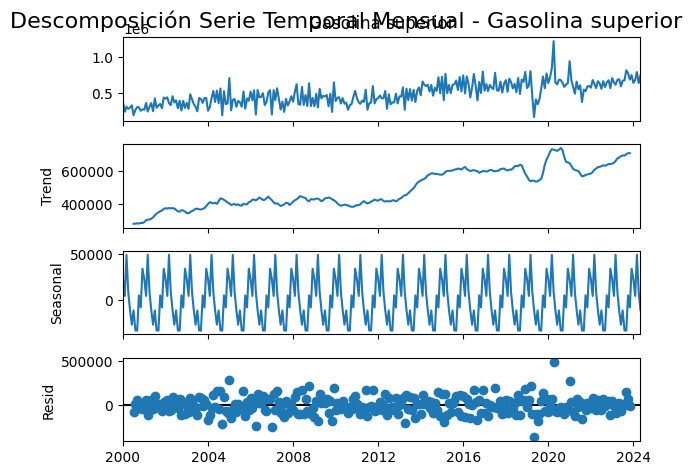

<Figure size 1400x1000 with 0 Axes>

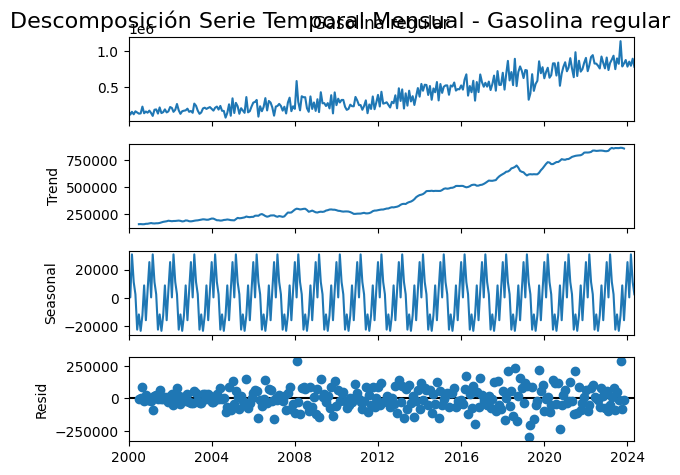

<Figure size 1400x1000 with 0 Axes>

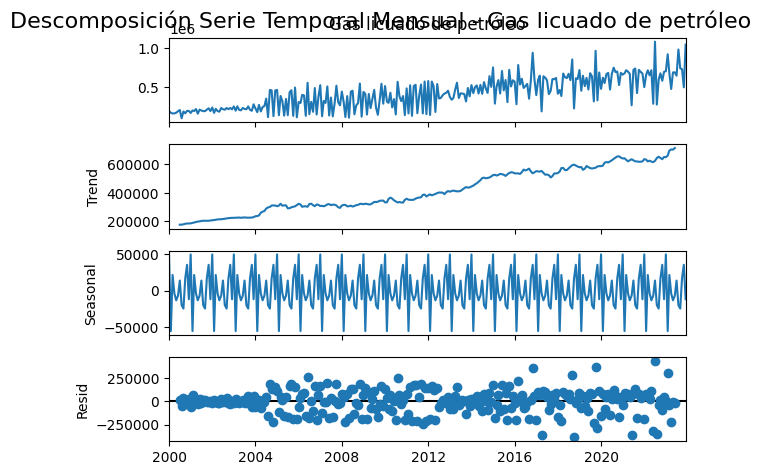

In [28]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Lista de columnas a analizar (excluyendo 'Fecha' porque ya es índice)
columnas_a_analizar = [
    'Diesel alto azufre',
    'Gasolina superior',
    'Gasolina regular',
    'Gas licuado de petróleo'
]

for columna in columnas_a_analizar:
    serie = importaciones_filtrado[columna].dropna()

    # Descomposición aditiva con periodo 12 (mensual)
    resultado = seasonal_decompose(serie, model='additive', period=12)

    # Graficar
    plt.figure(figsize=(14, 10))
    resultado.plot()
    plt.suptitle(f'Descomposición Serie Temporal Mensual - {columna}', fontsize=16)
    plt.show()


### Analisis

Podemos ver que todas representan tendencia a excepcion del diesel que su tendenca es negativa. Tambien podemos ver que en todas hay estacionalidad lo que significa que los precios de cada combustible se han ido aumentando debido a la altademanda y tambien que hay epocas en donde cada uno es mas exigido que otro , pero se puede observar que el disel ha estado en desuso ultimadamente.

## Consumo

Grafica

/tmp/ipython-input-34-1212004436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones_filtrado['Fecha'] = pd.to_datetime(importaciones_filtrado['Fecha'], format='%Y-%m')


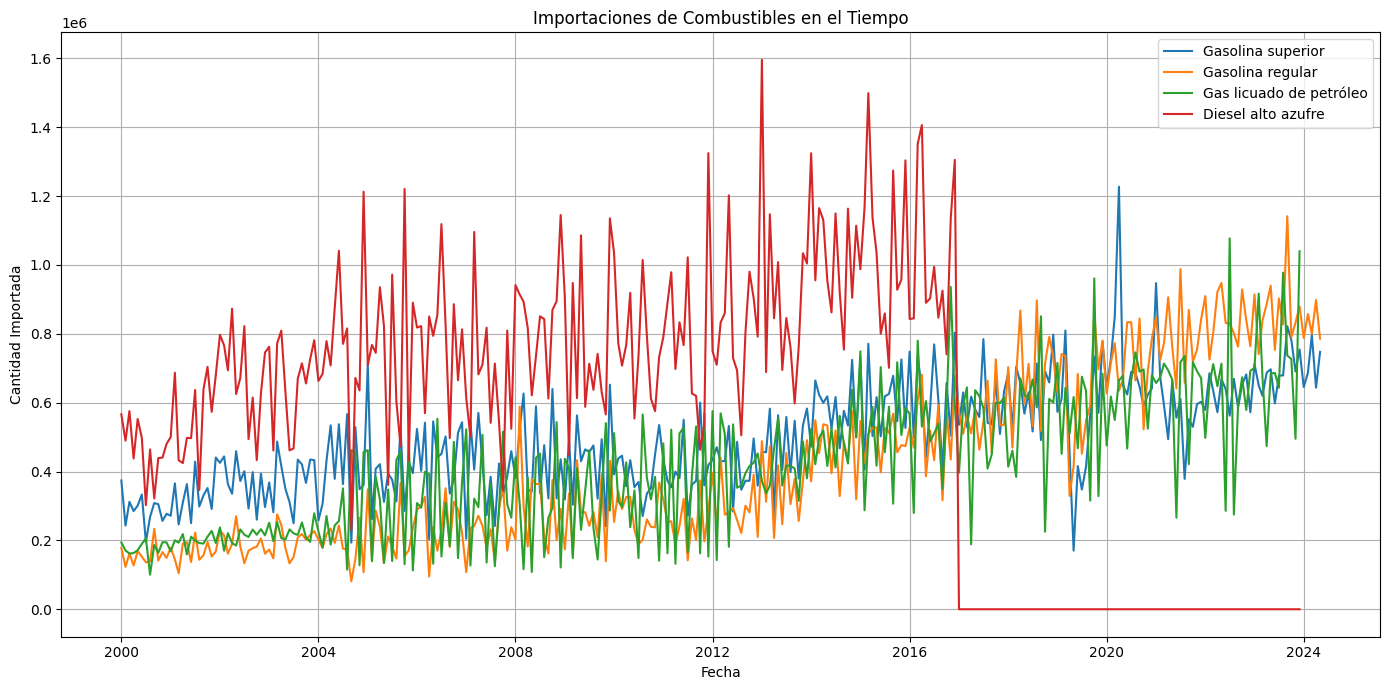

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar formato datetime para graficar correctamente
importaciones_filtrado['Fecha'] = pd.to_datetime(importaciones_filtrado['Fecha'], format='%Y-%m')

plt.figure(figsize=(14, 7))
for columna in columnas_deseadas[1:]:  # Excluimos 'Fecha'
    plt.plot(importaciones_filtrado['Fecha'], importaciones_filtrado[columna], label=columna)

plt.title('Importaciones de Combustibles en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Componentes

/tmp/ipython-input-35-463827276.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importaciones_filtrado[col] = pd.to_numeric(importaciones_filtrado[col], errors='coerce')


<Figure size 1400x1000 with 0 Axes>

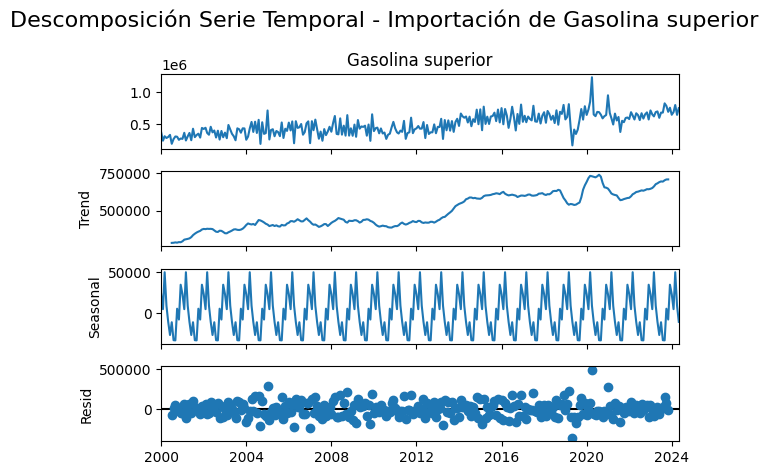

<Figure size 1400x1000 with 0 Axes>

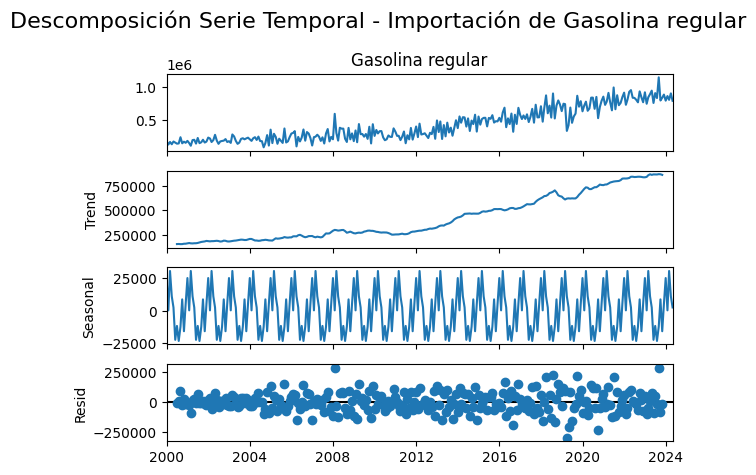

<Figure size 1400x1000 with 0 Axes>

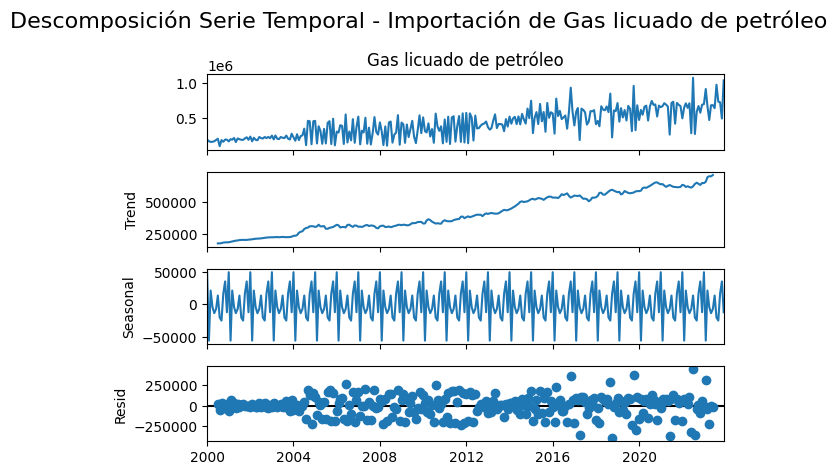

<Figure size 1400x1000 with 0 Axes>

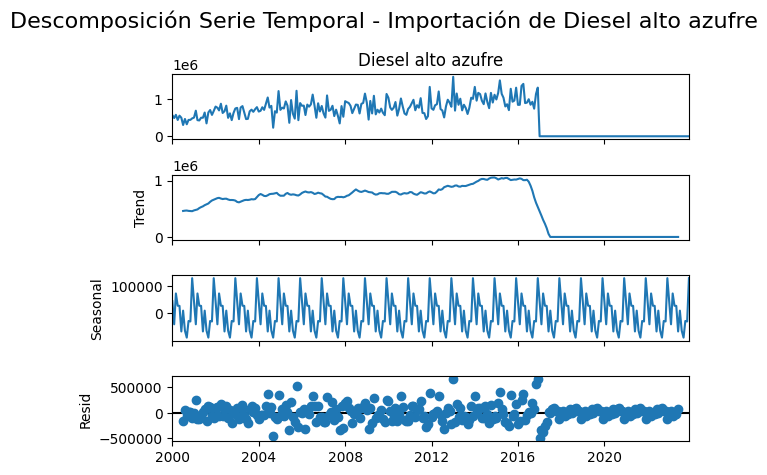

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Establecer Fecha como índice temporal
importaciones_filtrado.set_index('Fecha', inplace=True)

# Convertir a numérico cada columna por si acaso
for col in columnas_deseadas[1:]:
    importaciones_filtrado[col] = pd.to_numeric(importaciones_filtrado[col], errors='coerce')

# Descomposición y gráfica para cada combustible
for columna in columnas_deseadas[1:]:
    serie = importaciones_filtrado[columna].dropna()

    if len(serie) >= 24:  # Al menos 2 años de datos para seasonal_decompose con period=12
        resultado = seasonal_decompose(serie, model='additive', period=12)

        plt.figure(figsize=(14, 10))
        resultado.plot()
        plt.suptitle(f'Descomposición Serie Temporal - Importación de {columna}', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"[❗] No hay suficientes datos para descomponer la serie: {columna}")


## Analisis

Hemos observado un aumento general en el consumo de todos los combustibles a lo largo del período analizado, lo cual refleja una tendencia creciente sostenida en la demanda energética del país. Esta tendencia puede estar relacionada con una mayor actividad económica, crecimiento del parque vehicular o estacionalidades propias del mercado.

No obstante, se destaca el caso del diésel alto en azufre, cuyo consumo ha mostrado una disminución significativa desde el año 2020. Esta caída podría estar vinculada a diversos factores:

Preferencia del consumidor por combustibles más económicos o eficientes.

Normativas ambientales que desincentivan el uso de diésel con alto contenido de azufre.

Modernización de flotas de transporte, migrando hacia tecnologías más limpias.

Ademas en dodas se puede ver sierta estacionalidad , lo que indica tendencias siempre en el mercado de estar consumiendo el producto